Instructions for updating:
Use `tf.global_variables_initializer` instead.
Step #200 A = [[8.5094795]], b = [[-3.389269]]
Step #400 A = [[10.059332]], b = [[-4.60011]]
Step #600 A = [[11.10389]], b = [[-5.3502755]]
Step #800 A = [[11.770361]], b = [[-5.9043293]]
Step #1000 A = [[12.371961]], b = [[-6.2998643]]


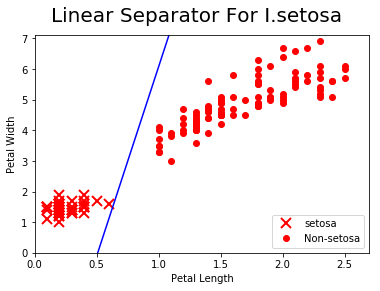

In [5]:
# Combining Everything Together
#----------------------------------
# This file will perform binary classification on the
# class if iris dataset. We will only predict if a flower is
# I.setosa or not.
#
# We will create a simple binary classifier by creating a line
# and running everything through a sigmoid to get a binary predictor.
# The two features we will use are pedal length and pedal width.
#
# We will use batch training, but this can be easily
# adapted to stochastic training.

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

# Load the iris data
# iris.target = {0, 1, 2}, where '0' is setosa
# iris.data ~ [sepal.width, sepal.length, pedal.width, pedal.length]
iris = datasets.load_iris()
binary_target = np.array([1. if x==0 else 0. for x in iris.target])
iris_2d = np.array([[x[2], x[3]] for x in iris.data])

# Declare batch size
batch_size = 20

# Create graph
sess = tf.Session()

# Declare placeholders
x1_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
x2_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables A and b (0 = x1 - A*x2 + b)
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

# Add model to graph:
# x1 - A*x2 + b
my_mult = tf.matmul(x2_data, A)
my_add = tf.add(my_mult, b)
my_output = tf.subtract(x1_data, my_add)
#my_output = tf.sub(x_data[0], tf.add(tf.matmul(x_data[1], A), b))

# Add classification loss (cross entropy)
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output, labels=y_target)

# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

# Initialize variables
init = tf.initialize_all_variables()
sess.run(init)

# Run Loop
for i in range(1000):
    rand_index = np.random.choice(len(iris_2d), size=batch_size)
    #rand_x = np.transpose([iris_2d[rand_index]])
    rand_x = iris_2d[rand_index]
    rand_x1 = np.array([[x[0]] for x in rand_x])
    rand_x2 = np.array([[x[1]] for x in rand_x])
    #rand_y = np.transpose([binary_target[rand_index]])
    rand_y = np.array([[y] for y in binary_target[rand_index]])
    sess.run(train_step, feed_dict={x1_data: rand_x1, x2_data: rand_x2, y_target: rand_y})
    if (i+1)%200==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ', b = ' + str(sess.run(b)))
        

# Visualize Results
# Pull out slope/intercept
[[slope]] = sess.run(A)
[[intercept]] = sess.run(b)

# Create fitted line
x = np.linspace(0, 3, num=50)
ablineValues = []
for i in x:
  ablineValues.append(slope*i+intercept)

# Plot the fitted line over the data
setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==1]
setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==1]
non_setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==0]
non_setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==0]
plt.plot(setosa_x, setosa_y, 'rx', ms=10, mew=2, label='setosa')
plt.plot(non_setosa_x, non_setosa_y, 'ro', label='Non-setosa')
plt.plot(x, ablineValues, 'b-')
plt.xlim([0.0, 2.7])
plt.ylim([0.0, 7.1])
plt.suptitle('Linear Separator For I.setosa', fontsize=20)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc='lower right')
plt.show()